# Dynex SDK - Complex Native Gate Circuit Example

First we import the required packages:

In [2]:
import dynex
import dynex_circuit
from pennylane import numpy as np
import pennylane as qml

We define our circuit:

In [3]:
params = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6])
wires = 12

def Complex2(params):
       for i in range(12):
           qml.Hadamard(wires=i)
       qml.CNOT(wires=[0, 1])
       qml.CNOT(wires=[2, 3])
       qml.CNOT(wires=[4, 5])
       qml.CNOT(wires=[6, 7])
       qml.CNOT(wires=[8, 9])
       qml.CNOT(wires=[10, 11])
       qml.RX(params[0], wires=0)
       qml.RY(params[1], wires=1)
       qml.RZ(params[2], wires=2)
       qml.RX(params[3], wires=3)
       qml.RY(params[4], wires=4)
       qml.RZ(params[5], wires=5)
       qml.RX(params[6], wires=6)
       qml.RY(params[7], wires=7)
       qml.RZ(params[8], wires=8)
       qml.RX(params[9], wires=9)
       qml.RY(params[10], wires=10)
       qml.RZ(params[11], wires=11)
       qml.CZ(wires=[0, 2])
       qml.CRZ(params[12], wires=[1, 3])
       qml.Toffoli(wires=[4, 5, 6])
       qml.SWAP(wires=[7, 8])
       qml.SWAP(wires=[9, 10])
       qml.CRZ(params[13], wires=[11, 0])
       qml.CRY(params[14], wires=[1, 2])
       qml.CRX(params[15], wires=[3, 4])
       qml.Toffoli(wires=[5, 6, 7])
       qml.SWAP(wires=[8, 9])
       return qml.state()

We draw the circuit:

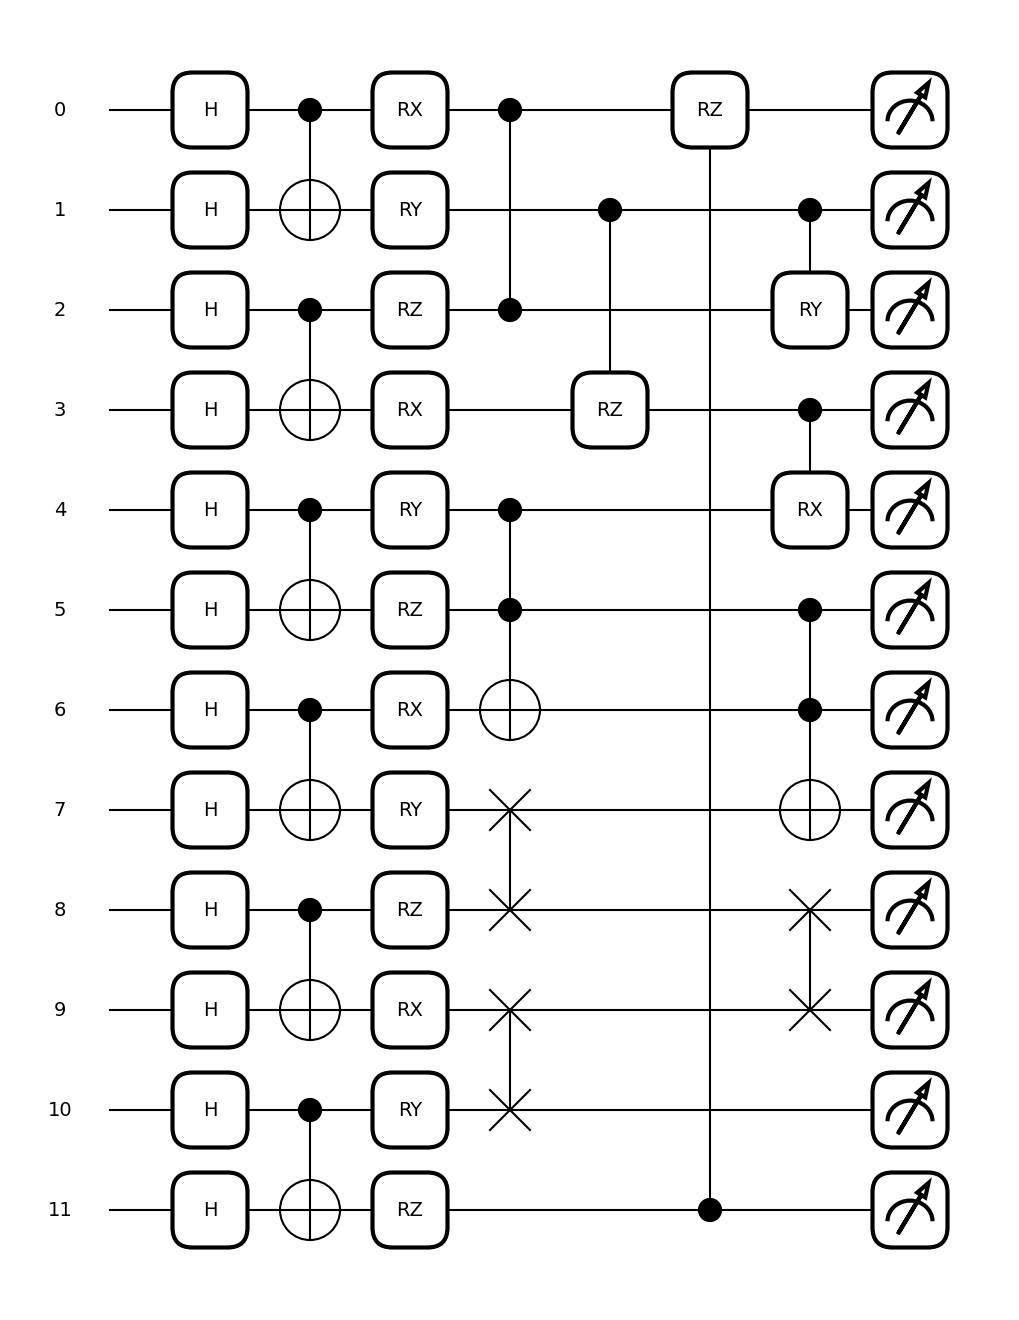

In [4]:
# draw circuit:
_ = qml.draw_mpl(Complex2, style="black_white")(params)

We execute and measure the circuit on the Dynex platform:

In [5]:
# Execute the circuit on Dynex:
measure = dynex_circuit.execute(Complex2, params, wires, mainnet=True, method='measure')
print('Mesaure:',measure)

╭────────────┬──────────┬─────────────────┬─────────────┬───────────┬────────────────┬────────────┬─────────┬────────────────╮
│   DYNEXJOB │   QUBITS │   QUANTUM GATES │   BLOCK FEE │   ELAPSED │   WORKERS READ │   CIRCUITS │   STEPS │   GROUND STATE │
├────────────┼──────────┼─────────────────┼─────────────┼───────────┼────────────────┼────────────┼─────────┼────────────────┤
│      29841 │      132 │             641 │        0.00 │      1.47 │              1 │    1748992 │     256 │      557305.00 │
╰────────────┴──────────┴─────────────────┴─────────────┴───────────┴────────────────┴────────────┴─────────┴────────────────╯
╭────────────┬─────────────────┬────────────┬───────┬───────────┬──────────────┬─────────────────────────────┬─────────────┬──────────╮
│     WORKER │         VERSION │   CIRCUITS │   LOC │    ENERGY │      RUNTIME │                 LAST UPDATE │       STEPS │   STATUS │
├────────────┼─────────────────┼────────────┼───────┼───────────┼──────────────┼─────────────